In [218]:
import pandas as pd

dataset=pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head(5)

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [219]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [220]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [221]:
ct= ColumnTransformer(
    transformers=[('encorder',OneHotEncoder(drop='first'), [2])],
    remainder= 'passthrough'
)
x_trans=ct.fit_transform(X) #. 0 공부시간, 1 

x_trans.shape, y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_trans, y, test_size=0.2, random_state=0)


In [222]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [223]:
y_pred=reg.predict(X_test)
y_pred, y_test #앞은 예측값, 뒤는 실제값

reg.coef_ #기울기값 array([-5.82712824, -1.04450647, 10.40419528, -1.64200104]) (집에서 공부했을때, 도서관에서 공부했을 때, [카페 0, 표기 X], 공부시간, 결석횟수)
# 결론: 카페에서 공부했을떄 공부효과가 가장 좋음(0) > 도서관 > 집

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [224]:
#y=m1*x1 + m2*x2 +m3*x3 +1

In [225]:
#다중선형회귀 예제

# 예제1, 카페에서 9시간 공부, 결석은 1회일 경우 예측되는 점수(predict)
reg.predict([[0,0, 9, 1]]) # 카페공부(0,0), 공부시간 9시간, 결석 1회 1
# 예제2, 집에서 9시간 공부, 결석은 1회일 경우 예측되는 점수(predict)
reg.predict([[1,0, 9, 1]])
# 예제3, 도서관에서 9시간 공부, 결석은 1회일 경우 예측되는 점수(predict)
reg.predict([[0,1, 9, 1]])


array([96.3162567])

In [226]:
#9/24 오전 복습
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font',family="Malgun Gothic")
plt.rc('axes',unicode_minus=False) # 데이터 시각화 한글 깨짐 방지

In [227]:
dataset=pd.read_csv('data/MultipleLinearRegressionData.csv',on_bad_lines='skip')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values



In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(
    transformers=[('encorder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough'
)

X_trans=ct.fit_transform(X)
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_trans, y, test_size=0.2)
X_trans.shape

(20, 4)

In [230]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
pred=reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)
y_pred,y_train

y_pred=reg.predict(X_test)
y_pred,y_test

(array([ 84.12343422,  10.72486887,  61.38002416, 106.99078338]),
 array([ 86,   8,  62, 100]))

In [231]:
reg.coef_
X_train[0]

array([0.0, 0.0, 1.8, 2], dtype=object)

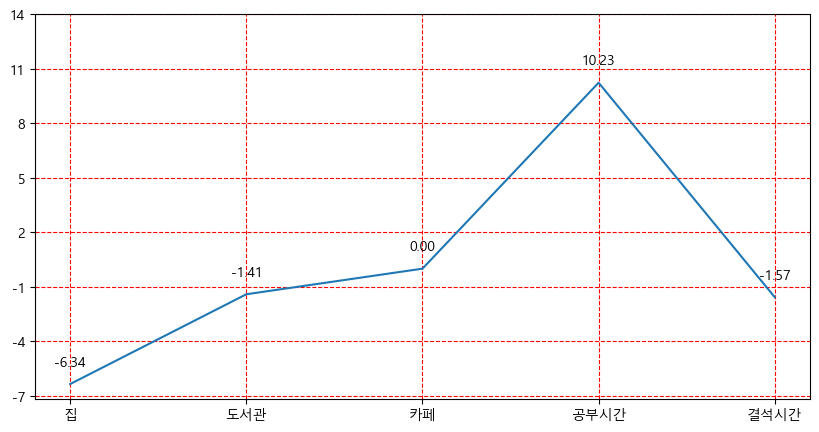

In [232]:
X=['집','도서관','카페','공부시간','결석시간']
y=[reg.coef_[0],reg.coef_[1],0,reg.coef_[2],reg.coef_[3]] #OneHotEncoder 영향
plt.figure(figsize=(10,5))
plt.plot(X,y)
plt.grid(True,color='r',ls='--')
for idx in range(len(X)):
    plt.text(idx, y[idx]+1, f'{y[idx]:.2f}',ha='center')
plt.yticks([y for y in range(-7,15,3)])
plt.show()


In [233]:
#모델 다중선형함수
def model_multi():
    import pandas as pd
    dataset=pd.read_csv('data/MultipleLinearRegressionData.csv',on_bad_lines='skip')
    X=dataset.iloc[:,:-1].values
    y=dataset.iloc[:,-1].values

    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    ct=ColumnTransformer(
    transformers=[('encorder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough'
    )   

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test=train_test_split(X_trans, y, test_size=0.2)
    from sklearn.linear_model import LinearRegression
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    return reg

model=model_multi()

In [234]:
#집에서 9시간 공부, 결석1회 시 점수는? (집 10, 도서관 0,1 카페 0,0)
pred=model.predict([[1,0,9,1], [0,1,9,1],[0,0,9,1]])
print(f'집:{pred[0]:.2f}점, 도서관:{pred[1]:.2f}점, 카페:{pred[2]:.2f}점')

집:92.19점, 도서관:96.24점, 카페:97.97점


In [235]:
dict={'집':[1,0],'도서관':[0,1],'카페':[0,0]}
place='집'
p1=dict.get(place)[0]#dict(딕서너리)에서 place를 받아 0번째 값을 추출
p2=dict.get(place)[1]
hour=9
absent=1

model.predict([[p1,p2,hour,absent]])


array([92.18999584])

In [236]:
def predict(place, hour, absent):
    dict={'집':[1,0],'도서관':[0,1],'카페':[0,0]}
    p1=dict.get(place)[0]#dict(딕서너리)에서 place를 받아 0번째 값을 추출
    p2=dict.get(place)[1]
    pred=model.predict([[p1,p2,hour,absent]])
    print(f'장소{place} | 공부시간:{hour}시간 | 결석횟수:{absent}회 | 예상점수:{pred[0]:.2f}점')

predict('집',9,1)

장소집 | 공부시간:9시간 | 결석횟수:1회 | 예상점수:92.19점


In [237]:
model.score(X_train,y_train), model.score(X_train,y_train)

(0.9629503795690342, 0.9629503795690342)

In [238]:
xticks=[f'{place(x[0],x[1])}, 시간:{x[2]}, 결석:{x[3]}' for x in X_train]
xticks #배열값

def place(x0, x1): #place에서 값을 받으면 places(dict)의 자료와 비교하여(10,,01,00) 값을 출력해줌
    places={'10':'집','01':'도서관','00':'카페'}
    x0=int(x0)
    x1=int(x1)
    x=f'{x0}{x1}'
    return places[x]

place(0,1) #도서관 추출
place(0,0) #카페

TypeError: 'str' object is not callable

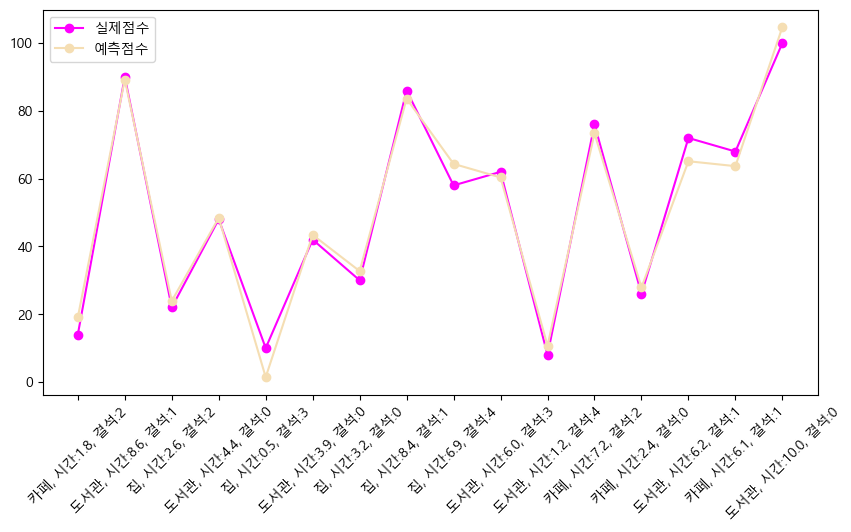

In [ ]:
x=[idx for idx, x in enumerate(X_train)] #enumerate 시 index값이 옴
plt.figure(figsize=(10,5))
plt.plot(x, y_train, marker='o', color='magenta', label='실제점수')
plt.plot(x,reg.predict(X_train), marker='o',color='wheat',label='예측점수')
plt.legend()
plt.xticks(x,xticks,rotation=45)
plt.show()


In [ ]:
df=pd.read_csv('data/다중선형회귀.csv')
df
pred_y=model.predict(X_train)
pred_y

array([  2.82534472,  24.8380369 ,  69.60719306,  26.50987699,
        88.35448735,  34.36130945,  45.19652387,  11.77409885,
        49.98848385, 103.65843556,  37.38810393,  59.6633749 ,
        36.03314954,  62.2759721 ,  82.3112329 ,  65.35307947])

In [ ]:
X_df=df.iloc[:,1:4].values
X_df[:1]

array([[0.5, 3, 'Home']], dtype=object)

In [ ]:
ct=ColumnTransformer(
    transformers=[('encorder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough'
)
X_trans=ct.fit_transform(X_df)
X_trans[:5]
y_pred=reg.predict(X_trans)
y_pred

array([ 1.4251857 , 10.72668467, 19.08320581, 27.88528816, 23.91508813,
       32.71717048, 43.40490042, 48.4295841 , 38.85019323])

In [ ]:
y_pred=reg.predict(X_trans)
df_y=pd.DataFrame(y_pred)
df_y

df_join=df.join(df_y)
df_join.rename(columns={0:'예측점수'})


,name,hour,absent,place,예측점수
0,홍길동,10.0,3,Home,0.198028
1,심청이,8.5,4,Library,10.724869
2,강감찬,5.5,2,Cafe,21.405014
3,성춘향,2.4,0,Cafe,30.677598
4,김길동,2.6,2,Home,23.241865
5,이순신,3.2,0,Home,32.514449
6,조인성,9.5,0,Library,44.609657
7,송혜교,6.9,0,Library,49.722864
8,송중기,4.5,5,Home,37.966949
9,김혜수,9.7,1,Cafe,55.697907
